In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
#%matplotlib inline

Purpose: Determine whether the drone  or its payload contributes to any noise detected by the spectrum analyzer during flight testing at the Sevilleta LWA. Test equipment used was a Fieldfox spectrum analyzer, biconical antenna, and low noise amplifier. Background noise spectra was recorded before each flight during the field test, and several spectra were taken during each flight as the drone completed its flight path. Each flight spectra was compared to its respective background to determine if there is an excess of noise above the background, and if any of the noise is being emitted into the band of interest, 70MHz.

To begin, all of the main flight background spectra were collected into an array and a for loop was used to iterate through each spectra file and plotting them.

In [2]:
#Final Confidence Bound Code

filelist=[r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\DAY3BACK2.csv',
         r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_B.csv',
        r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_B.csv',
         r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4FB.csv',
        r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4FB_2.csv' ]



A function was created to iterate through each spectra in the array, skip the first several lines, and append the values in columns 0 and 1 (frequency and power columns) into another array which is returned.

In [3]:
def load_fieldfox(filename):
    f=open(filename)
    lines=f.readlines()
    d=[]
    for line in lines:
        if line[0]=='!': continue
        if line.startswith('BEGIN') or line.startswith('END') :continue
        vals=line.split(',')    
        d.append([vals[0],vals[1]])
    return np.array(d,dtype=np.float)



We create a for loop that utilizes the function to go through each file except the first and append the values to the the array bgrounds. 'bgrounds' is then stacked along axis -1 and sorted along axis -2

In [4]:
bgrounds=[]
for thingy in filelist[1:]: #[1:] skips the first file, which is a spectra with the highest noise floor
    
    bgrounds.append(load_fieldfox(thingy)) #

bgrounds=np.stack(bgrounds, axis=-1)

bgsorted=np.sort(bgrounds, axis=2)



'bgrounds' is then plotted in a figure one by one in multi colors and the confidence bound is plotted in black. The first observation is that confidence bound isn't what we expected it to be.

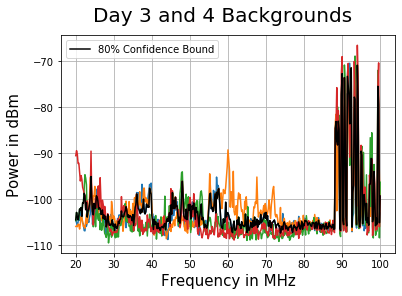

In [5]:
fig=figure()
plot(bgrounds[:,0,:]/1e6, bgrounds[:,1,:]) #all bground plots plot(x=freq,y=pwr)
#plot(bgrounds[:,1,:]) #[dim1,dim2,dim3], 1-power in 2nd dim. also plots bgrounds but x=#ofpnts
#plot(bgsorted[:,1,-2], 'k', label='80% Confidence Bound') #black line=80% confidence interval. x=#points
plot(bgsorted[:,0,-2]/1e6,bgsorted[:,1,-2], 'k', label='80% Confidence Bound')

fig.suptitle('Day 3 and 4 Backgrounds', fontsize=20)
xlabel('Frequency in MHz', fontsize=15)
ylabel('Power in dBm', fontsize=15)
legend(fontsize=10)
grid()
#savefig('Confidence Bound')

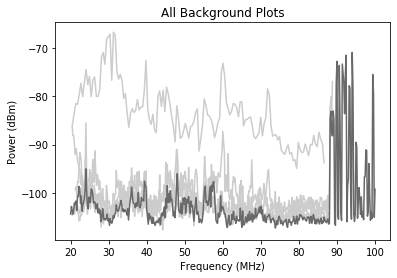

In [6]:
#day 3 backgrounds
back1 = np.array(pd.read_csv(r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\DAY3BACK2.csv', skiprows = 32, nrows=148, delimiter = ',',engine = 'python'))
back2 = np.array(pd.read_csv(r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_B.csv', skiprows = 28,  nrows = 340, delimiter = ',', engine = 'python'))
back3 = np.array(pd.read_csv(r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_B.csv', skiprows = 33,  nrows = 339, delimiter = ',', engine = 'python'))

#day 4 backgrounds
back4 = np.array(pd.read_csv(r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4FB.csv', skiprows = 32, nrows = 339, delimiter = ',', engine = 'python'))
back5 = np.array(pd.read_csv(r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4FB_2.csv', skiprows = 28,  nrows = 339, delimiter = ',', engine = 'python'))

alldaybacks = [back1, back2, back3, back4, back5]

#Plot of all background spectra with confidence bound

for i, back in enumerate(alldaybacks): #enumerate lets you reference both the object and the index of the object in a list
    x = [] #reset these for each file
    y = [] #reset these for each file
    for row in back: #we want to look through each day, not back1
        absorted=np.sort(back, axis=1)
        x.append(float(row[0])/1e6) 
        y.append(float(row[1]) + i) #no offset
        
   
    #plot all spectra in one window
    plt.plot(x,y, '0.8') 
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Power (dBm)')
    plt.title("All Background Plots")
    
    #highlight the max bound spectra
plot(bgsorted[:,0,-2]/1e6,bgsorted[:,1,-2], 'dimgray', label='80% Confidence Bound')

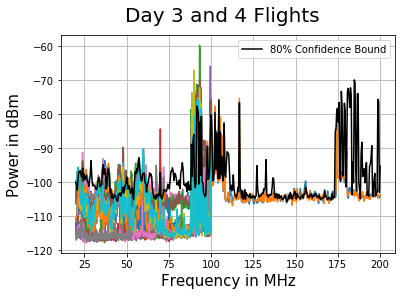

In [7]:
#Days 3 ad 4 flight spectra with confidence bound

flightfiles = [r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F5.csv', 
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F5_2.csv', 
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_1.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_2.csv',
            r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_3.csv',
            r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F6_4.csv',
            r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_1.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_2.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_3.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_4.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_5.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 3 10-25\F7_6.csv',
           
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F1.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F1_2.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F1_3.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_1.csv',
          r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_2.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_3.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_4.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_5.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F2_6.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_1.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_2.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_3.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_4.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_5.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_6.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_7.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_8.csv',
           r'C:\Users\shani\Documents\Work\LoCo Labs\ECHO\Sevilleta\Day 4 10-26\D4F3_9.csv']

flightspectra=[]
for flight in flightfiles:
    
    flightspectra.append(load_fieldfox(flight)) 

flightspectra=np.stack(flightspectra, axis=-1)
flightsorted=np.sort(flightspectra, axis=2)

fig=figure()
plot(flightspectra[:,0,:]/1e6, flightspectra[:,1,:]) #all flight plots plot(x=freq,y=pwr)
plot(flightsorted[:,0,-2]/1e6,flightsorted[:,1,-2], 'k', label='80% Confidence Bound')
#plot(flightspectra[:,1,:]) #[dim1,dim2,dim3], 1-power in 2nd dim. also plots flight but x=#ofpnts
#plot(flightsorted[:,1,-2], 'k', label='80% Confidence Bound') #black line=80% confidence interval. x=#points

fig.suptitle('Day 3 and 4 Flights', fontsize=20)
xlabel('Frequency in MHz', fontsize=15)
ylabel('Power in dBm', fontsize=15)
legend(fontsize=10)
grid()